# Part I:  Research Question

## A1. Research Question Summary

My data set for this sentiment analysis exercise includes data from a subset of Amazon reviews.  Data analysis performed on the dataset will be aimed with this research question in mind: can a neural network be employed to classify the sentiment of a review based on natural language as its input?

## A2. Objectives and Goals

My objective, beyond reaching a conclusive answer to the above research question, will be to perform exploratory data analysis on the Amazon review data set, clean and prepare the data for consumption by a neural network, and evaluate the resulting accuracy and confidence metrics once my model is tested.

## A3. Type of Neural Network

Neural networks offer better performance than typical linear classification methods when dealing with natural language.  Convolutional neural networks in particular are effective at document classification due to their ability to analyze the sequence in which language is used rather than simply considering the presence of words.  This non-linear nature of the CNN often leads to superior classification accuracy (Goldberg, 2015).

---

# Part II:  Data Preparation

Before beginning the data cleaning and preparation process, I will need to import some Python packages, import the data, gather some general information on the data set, and eliminate columns containing data that is not relevant to this exercise.  In addition, rows that contain a null value in any remaining columns will be removed.  

Once this is done, I concatenate the string data from the summary and reviewText columns, creating a new column named "review".  After this, the summary and reviewText columns are dropped.  Lastly, I will increase the max column width so that I can see more of each review when examining the data frame.

The code for these operations is included below, along with their respective outputs.



In [1]:
# Imports and housekeeping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import nltk
import tensorflow as tf
import re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.models import Sequential
from itertools import islice
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wstul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wstul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\wstul\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wstul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Import the json file containing Amazon review data
df = pd.read_json('Prime_Pantry.json', lines=True)

In [3]:
df

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style
0,5,True,"12 14, 2014",A1NKJW0TNRVS7O,B0000DIWNZ,Tamara M.,Good clinging,Clings well,1418515200,NaN,NaN,NaN
1,4,True,"11 20, 2014",A2L6X37E8TFTCC,B0000DIWNZ,Amazon Customer,Fantastic buy and a good plastic wrap. Even t...,Saran could use more Plus to Cling better.,1416441600,NaN,NaN,NaN
2,4,True,"10 11, 2014",A2WPR4W6V48121,B0000DIWNZ,noname,ok,Four Stars,1412985600,NaN,NaN,NaN
3,3,False,"09 1, 2014",A27EE7X7L29UMU,B0000DIWNZ,ZapNZs,Saran Cling Plus is kind of like most of the C...,"The wrap is fantastic, but the dispensing, cut...",1409529600,4,NaN,NaN
4,4,True,"08 10, 2014",A1OWT4YZGB5GV9,B0000DIWNZ,Amy Rogers,This is my go to plastic wrap so there isn't m...,has been doing it's job for years,1407628800,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
471609,5,True,"05 16, 2017",A19GSVHXVT5NNF,B01HI8JVI8,Mary Bright,Easy and delicious! I am usually a make-my-own...,Easy and delicious,1494892800,NaN,NaN,NaN
471610,5,True,"05 3, 2017",ABSCTKLX9F9IU,B01HI8JVI8,Lisa and Eric,Our elderly neighbor loves this and eats it on...,Salsa,1493769600,NaN,NaN,NaN
471611,5,False,"04 20, 2017",A2R33RCWKDHZ3L,B01HI8JVI8,Elle S.,"Great product, great price.",Five Stars,1492646400,NaN,NaN,NaN
471612,5,True,"04 19, 2017",A2INGHYEXZDHMC,B01HI8JVI8,Shelina is Platinum!,Great size value for the price! Salsa is chunk...,Five Stars,1492560000,NaN,NaN,NaN


In [4]:
# Output the number of rows and columns in the data set
df.shape

(471614, 12)

In [5]:
# Display column names, non-null value counts, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471614 entries, 0 to 471613
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         471614 non-null  int64 
 1   verified        471614 non-null  bool  
 2   reviewTime      471614 non-null  object
 3   reviewerID      471614 non-null  object
 4   asin            471614 non-null  object
 5   reviewerName    471578 non-null  object
 6   reviewText      471233 non-null  object
 7   summary         471473 non-null  object
 8   unixReviewTime  471614 non-null  int64 
 9   vote            41716 non-null   object
 10  image           3568 non-null    object
 11  style           6933 non-null    object
dtypes: bool(1), int64(2), object(9)
memory usage: 40.0+ MB


In [6]:
# Export the imported data set to a CSV file
df.to_csv(r'C:\Users\wstul\d213\prime_pantry_reviews.csv')

In [7]:
# Remove columns not relevant to objective from data frame
df = df.drop(['vote', 'image', 'style', 'verified', 'reviewTime', 'reviewerID', 
              'asin', 'reviewerName', 'unixReviewTime'], axis = 1)

In [8]:
# Check the remaining columns for null values
df.isnull().sum()

overall         0
reviewText    381
summary       141
dtype: int64

In [9]:
# Drop rows with null values from the data frame
df = df.dropna()

In [10]:
# Verify that null values have been removed
df.isnull().sum()

overall       0
reviewText    0
summary       0
dtype: int64

In [11]:
# Output the number of rows and columns in the reduced data set
df.shape

(471115, 3)

In [12]:
# Concatenate text in summary and reviewText columns to produce a single review column
df['review'] = df[['summary', 'reviewText']].agg(' '.join, axis=1)

In [13]:
# Drop the summary and reviewText columns
df = df.drop(['summary', 'reviewText'], axis = 1)

In [14]:
# Output the number of rows and columns in the reduced data set
df.shape

(471115, 2)

In [15]:
# Expand column width for review column and view data set
pd.set_option('display.max_colwidth', 200)
df

,overall,review
0,5,Clings well Good clinging
1,4,"Saran could use more Plus to Cling better. Fantastic buy and a good plastic wrap. Even though labeled ""Cling Plus,"" I feel that another plastic wrap holds and clings tighter for me.\nStill, for t..."
2,4,Four Stars ok
3,3,"The wrap is fantastic, but the dispensing, cutting, & packaging is lackluster, making the Saran less convenient & time-saving Saran Cling Plus is kind of like most of the Cling Wrap from Glad. It ..."
4,4,has been doing it's job for years This is my go to plastic wrap so there isn't much bad I can say. Plastic wrap is kind of a pain when you are trying to get it off the roll and it sticks to itself...
...,...,...
471609,5,Easy and delicious Easy and delicious! I am usually a make-my-own-salsa kind of a person but sometimes you can't beat the convenience and it's nice to keep these around in case you have unexpected...
471610,5,Salsa Our elderly neighbor loves this and eats it on everything.
471611,5,"Five Stars Great product, great price."
471612,5,Five Stars Great size value for the price! Salsa is chunky & hearty. Full of FLAVOR!!!


## B1. Exploratory Data Analysis

* Presence of Unusual Characters

The isascii() function provides a quick way to determine whether any non-ASCII characters are present in the review text.  I employed this by creating a new column named "asciicheck" and routing the output of the isascii() function for each review to the new column.  The presence of non-ASCII characters would be indicated by a "False" value in the asciicheck column.


In [16]:
# Create an 'asciicheck' column
# Check each review for non-ascii characters and populate asciicheck column with results
# True = all ascii
# False = non-ascii character detected
df['asciicheck'] = df['review'].apply(lambda x: x.isascii())
print(df['asciicheck'].value_counts())

True    471115
Name: asciicheck, dtype: int64


Before determining vocabulary size, word embedding length, and maximum sequence length, I will perform further cleaning on the text data in the review column.  I am employing a set of functions, seen below, that will put the text through a series of transformations resulting in text that adheres to more uniform formatting.  These steps include:
1. Conversion of all characters to lowercase
2. Removal of all punctuation
3. Removal of newline characters
4. Removal of "stopwords"
5. Lemmatization

Once these transformations are complete, I will check the review column for any blank reviews and drop those rows if any exist.

In [17]:
# Simple remove punctuation
def remove_punctuation(text):
    text_nopunct = "".join([c for c in text if c not in string.punctuation])
    return text_nopunct

# Remove newline (\n) characters and replace with space
def remove_newline(text):
    return ' '.join(text.splitlines())

# Remove stopwords and extra space
def remove_stopwords(text):
    text_words = re.split('\W+', text)
    text_nostop = [word for word in text_words if word not in stopwords]
    return text_nostop

# Remove punctuation and replace with space
def remove_punctuation_2(text):
    text_nopunct = " ".join([c for c in text if c not in string.punctuation])
    return text_nopunct

# Simple lemmatization function
def lemmatization(text):
    wn = nltk.WordNetLemmatizer()
    text_words = re.split('\W+', text)
    lemmatext = [wn.lemmatize(word) for word in text_words]
    return lemmatext

In [18]:
stopwords = nltk.corpus.stopwords.words('english')
df['review'] = df['review'].map(lambda x: x.lower())
df['review'] = df['review'].apply(lambda x: remove_punctuation(x))
df['review'] = df['review'].apply(lambda x: remove_newline(x))
df['review'] = df['review'].apply(lambda x: remove_stopwords(x))
df['review'] = df['review'].apply(lambda x: remove_punctuation_2(x))
df['review'] = df['review'].apply(lambda x: lemmatization(x))
df['review'] = df['review'].apply(lambda x: remove_punctuation_2(x))
df.head()

,overall,review,asciicheck
0,5,cling well good clinging,True
1,4,saran could use plus cling better fantastic buy good plastic wrap even though labeled cling plus feel another plastic wrap hold cling tighter still price roll size ill order product needed amazon ...,True
2,4,four star ok,True
3,3,wrap fantastic dispensing cutting packaging lackluster making saran le convenient timesaving saran cling plus kind like cling wrap glad good quality plastic wrap delivery system poorly executed ma...,True
4,4,job year go plastic wrap isnt much bad say plastic wrap kind pain trying get roll stick dont seem problem cling plus come nice rip well usually stick well need say use wrap thing go container dont...,True


In [37]:
# Post-transformation check for blank entries in review column
blank_reviews = df[df['review'] == ''].index
blank_reviews

Int64Index([ 11453,  14177,  21716,  77990,  81752,  89597, 100667, 106003,
            106341, 106536, 110557, 113674, 126784, 128206, 141753, 153375,
            177897, 183820, 207094, 211344, 212040, 213631, 223385, 227946,
            231032, 234374, 235169, 246876, 252103, 258603, 268637, 298257,
            302412, 320154, 329583, 336059, 351223, 373462, 395641, 396935,
            416045, 419410, 443771, 465529, 471376],
           dtype='int64')

In [38]:
# Drop rows with blank reviews and run blank review check again to confirm deletion
df.drop(blank_reviews , inplace=True)
df[df['review'] == ''].index

Int64Index([], dtype='int64')

* Vocabulary Size

To determine the vocabulary size, which will be needed for model configuration later, I will tokenize the text in the review column using the Keras Tokenizer() object.  Once the tokenizer is fitted to the review texts, I will have a word index to utilize in determining the vocabulary size.  The vocabulary size is determined by taking the returned value when using the len() function on the word index, and then adding 1.  For me, this results in a vocabulary size of 93847.

In [42]:
# Initialize Tokenizer and fit to review texts
tokenizer = Tokenizer()
fit_text = df['review']
tokenizer.fit_on_texts(fit_text)

In [43]:
# Return the first n vales of a dictionary
def take(n, iterable):
    return list(islice(iterable, n))

# Create a word index from tokens and print the first 10 dictionary entries
token_dict = tokenizer.word_index
tokensamples = take(10, token_dict.items())
print(tokensamples)

[('star', 1), ('great', 2), ('five', 3), ('good', 4), ('love', 5), ('like', 6), ('product', 7), ('taste', 8), ('one', 9), ('use', 10)]


In [44]:
# Determine vocabulary size via len() on word index and adding 1
vocabulary_size = len(token_dict) + 1
print("Vocabulary Size: ", vocabulary_size)

Vocabulary Size:  93847


* Proposed Word Embedding Length

According to Sally Goldman, a Google research scientist, "a good empirical rule of thumb is the number of dimensions to be roughly the fourth root" of the vocabulary size (Goldman, 2022).  The code and output shown below display my calculation of embedding dimension for this vocabulary set.

In [52]:
max_sequence_embedding = int(round(np.sqrt(np.sqrt(vocabulary_size)), 0))
max_sequence_embedding

18

* Maximum Sequence Length

The most natural value for maximum sequence length is to use the longest review (measured in words) as the basis.  The code and output below show how I determine the highest word count among the reviews in the cleaned data set.

In [45]:
# Identify the longest review stated in number of words
max_words = df['review'].str.split("\\s+")
word_count= max_words.str.len().max()
print("Longest word count: ", word_count)

Longest word count:  1112


## B2. Goals of the Tokenization Process

Tokenization involves breaking down the raw text into individual pieces, or "tokens", which makes evaluating the context in which each word is used easier for the CNN.  The goal of this tokenization process is to prepare the text for consumption by the neural network and enable a more accurate interpretation of the meaning of the text (Chakravarthy, 2020).

The packages and code I utilized to normalize text for tokenization can be found in the previous sections of this document.

## B3. Padding Process

When working with convolutional neural networks, each instance of input data must be the same length.  Since it is common for sentences and reviews to be of varying length we employ a transformation known as padding.  Padding adds "masked" steps at the start or end of a sequence, so sequences that are shorter than the longest sequence in the set will be "padded" with a placeholder value, giving all sequences in a batch a standard length.  Tensorflow documentation recommends padding the end of a sequence rather than the beginning for RNNs in particular, but considering the likelihood of more important information positioned at the beginning of our text sequences rather than the end, I will be padding the end of my sequences rather than the beginning (Tensorflow, 2022).

A sample of a single padded sequence is shown below.

In [50]:
padded_sequences = pad_sequences(sequences, maxlen=word_count, padding='post')
padded_sample = take(1, padded_sequences)
print(padded_sample)

[array([1509, 1752,  771, ...,    0,    0,    0])]


## B4. Sentiment Categories

Upon analyzing the quantity of each "star" score in the data set (shown below), the reviews are skewed toward more favorable reviews.  I will be using two categories of sentiment: negative and positive, which I will represent with the values 0 and 1 respectively.  As this makes my sentiment metric binary, the final dense layer of the CNN will use "sigmoid" as its activation function, which is appropriate when working with binary values.

Code performing the encoding of sentiment values in a new column of the data set is shown below.  Additionally, once this column is added, the final cleaned and prepared data set is exported to CSV format.

In [39]:
# Print how many 5, 4, 3, 2 and 1 star reviews there are in the data
print(df['overall'].value_counts())

5    328015
4     59202
3     32929
1     30586
2     20338
Name: overall, dtype: int64


In [40]:
# Create 'sentiment' column and populate with 0 or 1 based on star rating
overall_mapper = {1 : 0, 2 : 0, 3 : 0, 4 : 1, 5 : 1}
df['sentiment'] = df['overall'].replace(overall_mapper)
df

,overall,review,asciicheck,sentiment
0,5,cling well good clinging,True,1
1,4,saran could use plus cling better fantastic buy good plastic wrap even though labeled cling plus feel another plastic wrap hold cling tighter still price roll size ill order product needed amazon ...,True,1
2,4,four star ok,True,1
3,3,wrap fantastic dispensing cutting packaging lackluster making saran le convenient timesaving saran cling plus kind like cling wrap glad good quality plastic wrap delivery system poorly executed ma...,True,0
4,4,job year go plastic wrap isnt much bad say plastic wrap kind pain trying get roll stick dont seem problem cling plus come nice rip well usually stick well need say use wrap thing go container dont...,True,1
...,...,...,...,...
471609,5,easy delicious easy delicious usually makemyownsalsa kind person sometimes cant beat convenience nice keep around case unexpected guest,True,1
471610,5,salsa elderly neighbor love eats everything,True,1
471611,5,five star great product great price,True,1
471612,5,five star great size value price salsa chunky hearty full flavor,True,1


In [41]:
# Export cleaned data set to CSV
df.to_csv(r'C:\Users\wstul\d213\prime_pantry_reviews-cleaned.csv')

## B5. Preparation Summary, Training, Validation and Test Sets

Data preparation steps taken up to this point can be summarized as follows:

1. Import Python packages and download data for nltk functions
2. Import the Amazon JSON file as a data frame
3. Remove irrelevant columns and rows containing null values
4. Concatenate 'summary' and 'reviewText' columns and output to new 'review' column.  Drop origin columns
5. Check reviews for non-ASCII characters, then remove punctuation, newline characters, and stopwords
6. Perform lemmatization
7. Drop rows containing blank review text
8. Encode new 'sentiment' column with 0 and 1 values based on star rating ('overall' column)
9. Tokenize 'review' column text and determine vocabulary size and max review length

As a final step before performing analysis, I will split the relevant data from the data set into 3 subsets: a training set, a validation set, and a test set.  Typically when using only a training and test set an 80/20 split is appropriate.  With the addition of the validation set, the split will be 70/15/15.  The code sequence below shows how I performed the initial split and the second split, then confirmed the sizes of each matched set.  Once confirmed, I exported each set to CSV format.

In [46]:
# Create initial 70/30 split of data
# Further divide remaining data in half for validation and test sets
# Train set = 70%, validation set = 15%, test set = 15%
X = df['review']
y = df['sentiment']
X_train, X_remains, y_train, y_remains = train_test_split(X, y, train_size=0.70, random_state = 250)
X_validation, X_test, y_validation, y_test = train_test_split(X_remains, y_remains, train_size=0.50, random_state = 250)

# Print set shapes to verify matching
print("Training slice has ", X_train.shape, "items for X and ", y_train.shape, "items for y.")
print("Validation slice has ", X_validation.shape, "items for X and ", y_validation.shape, "items for y.")
print("Test slice has ", X_test.shape, "items for X and ", y_test.shape, "items for y.")

Training slice has  (329749,) items for X and  (329749,) items for y.
Validation slice has  (70660,) items for X and  (70660,) items for y.
Test slice has  (70661,) items for X and  (70661,) items for y.


In [47]:
# Convert train, validation and test sets to data frames
train_df = pd.DataFrame([X_train, y_train]).T
validation_df = pd.DataFrame([X_validation, y_validation]).T
test_df = pd.DataFrame([X_test, y_test]).T

# Export train, validation and test data frames to CSV
train_df.to_csv(r'C:\Users\wstul\d213\train.csv')
validation_df.to_csv(r'C:\Users\wstul\d213\validation.csv')
test_df.to_csv(r'C:\Users\wstul\d213\test.csv')

## B6. Copy of Prepared Data Sets

A copy of each prepared data set is provided separately as a part of this task submission.

---

# Part III:  Network Architecture

## C1. Model Summary

The code and output below show the tokenization process for the train, validation, and test sets, the model's construction (including parameters), and the results of Tensorflow's summary function.

In [48]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [49]:
sequences = tokenizer.texts_to_sequences(X_train)
sequence_sample = take(1, sequences)
print(sequence_sample)

[[1509, 1752, 771, 123, 328, 101, 4, 454, 5, 1524, 1509, 1752, 771, 123, 328, 101, 15, 771, 123, 36, 9, 47, 354, 328, 101, 741, 33741, 36]]


In [50]:
padded_sequences = pad_sequences(sequences, maxlen=word_count, padding='post')
padded_sample = take(1, padded_sequences)
print(padded_sample)

[array([1509, 1752,  771, ...,    0,    0,    0])]


In [51]:
sequences_validation = tokenizer.texts_to_sequences(X_validation)
padded_sequences_validation = pad_sequences(sequences_validation, maxlen=word_count, padding='post')
sequences_test = tokenizer.texts_to_sequences(X_test)
padded_sequences_test = pad_sequences(sequences_test, maxlen=word_count, padding='post')

In [52]:
max_sequence_embedding = int(round(np.sqrt(np.sqrt(vocabulary_size)), 0))
max_sequence_embedding

18

In [53]:
embed_layer = Embedding(vocabulary_size, max_sequence_embedding, input_length=word_count)

In [54]:
stopcheck = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [55]:
# define the model
model = Sequential()
model.add(embed_layer)
model.add(Flatten())
model.add(Dense(100, activation = "relu"))
model.add(Dense(50, activation = "relu"))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1112, 18)          1689246   
                                                                 
 flatten (Flatten)           (None, 20016)             0         
                                                                 
 dense (Dense)               (None, 100)               2001700   
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3,696,047
Trainable params: 3,696,047
Non-trainable params: 0
_________________________________________________________________
None


## C2. Number of Layers, Types of Layers, and Parameters

The model consists of five layers (layer type in parenthesis):

1. Embedding layer (Embedding)
2. Flatten layer (Flatten)
3. First dense layer (Dense)
4. Second dense layer (Dense)
5. Final dense layer (Dense)

The total number of parameters is 3,696,047, all of which are trainable.

## C3. Choice of Hyperparameters

* Activation Functions

Activation functions used on the first and second dense layers were both "ReLU", or rectified linear unit.  ReLU was chosen because it is simple, easy to work with, and generally produces great results.  It is versatile and suitable for a variety of tasks (Goldberg, 2015).

The final dense layer uses "sigmoid" as its activation function, which is appropriate when working with binary values.

* Nodes Per Layer

Node values for the embedding layer are determined based on the previously discovered values for vocabulary_size, max_sequence_embedding, and word_count (93847, 18, and 1112 respectively).

When determining an appropriate number of nodes for hidden dense layers, my research indicated that professionals will commonly recommend "experimentation".  As this was the first run-through for my model, I chose node values I commonly see used as a starting point, 100 and 50.  There was no other rationale used to make this decision, as the author is new to this process and elected to follow popular advice and then evaluate the effectiveness once results are available.

The final dense layer has a node value of 1, as the expected output will be a binary value (either 0 or 1). 

* Loss function

"Binary cross-entropy" is the chosen loss function for the model, as this is appropriate for "either-or" classification tasks.  It works by computing the cross-entropy between the actual sentiment values and predicted sentiment values (Borate, 2021).

* Optimizer

"Adam" was the optimizer of choice for this exercise.  Adam differs from classical stochastic gradient descent optimizers in that it realizes the benefits from two other optimization algorithms, AdaGrad and RMSProp.  Adam is a popular optimizer because it produces good results quickly with low impact on performance (Brownlee, 2017).

* Stopping Criteria

For my stopping criteria I am having the CNN monitor the loss metric when evaluated against the validation set, denoted by the 'val_loss' output.  The early stop check will monitor val_loss and once it has observed 2 epochs where the val_loss value increases when compared to the previous epoch, the learning process will terminate to avoid overfitting.

* Evaluation Metric

I will use accuracy as my evaluation metric for model fitness, as the end goal of the exercise is a model which accurately predicts sentiment.  The confidence of these predictions should hopefully remain high as my stopping criteria is based on loss.


---

# Part IV:  Model Evaluation

The model training process and output are illustrated in the code sample and results shown below.

In [56]:
train_results = model.fit(padded_sequences, y_train, 
                          validation_data = (padded_sequences_validation, y_validation), 
                          epochs = 20, callbacks = stopcheck)

Epoch 1/20
10305/10305 [==============================] - 418s 40ms/step - loss: 0.1659 - accuracy: 0.9334 - val_loss: 0.1505 - val_accuracy: 0.9406
Epoch 2/20
10305/10305 [==============================] - 382s 37ms/step - loss: 0.1261 - accuracy: 0.9504 - val_loss: 0.1508 - val_accuracy: 0.9418
Epoch 3/20
10305/10305 [==============================] - 385s 37ms/step - loss: 0.0953 - accuracy: 0.9632 - val_loss: 0.1700 - val_accuracy: 0.9390
Epoch 3: early stopping


## D1. Impact of Stopping Criteria

My stopping criteria caused the training process to halt after epoch 3, as it detected an increase in the val_loss value for 2 successive epochs.  All training epochs can be viewed in the output from the code above.

## D2. Visualizations

Line graphs of the loss and accuracy metrics during the training process are pictures below.

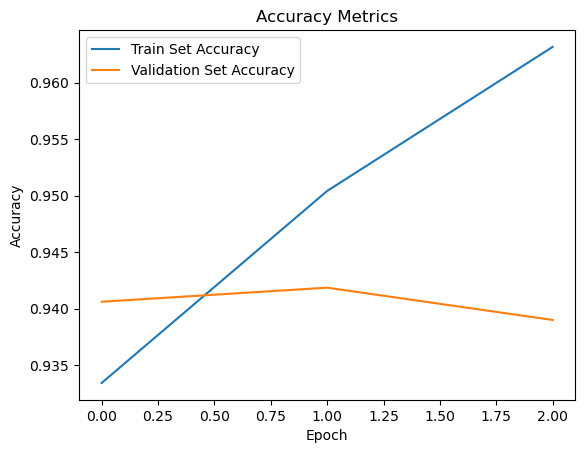

In [58]:
plt.plot(train_results.history['accuracy'], label= "Train Set Accuracy")
plt.plot(train_results.history['val_accuracy'], label= "Validation Set Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Metrics")
plt.show()

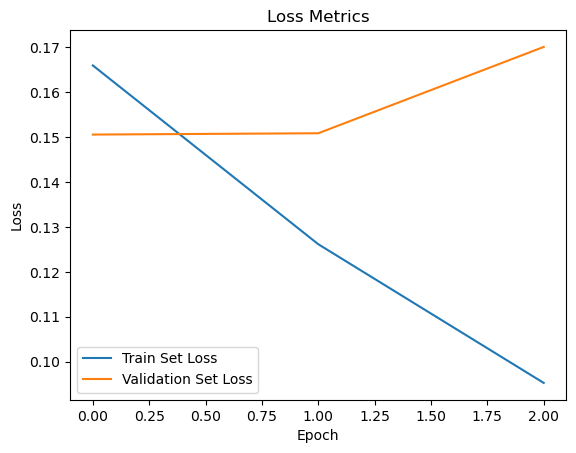

In [59]:
plt.plot(train_results.history['loss'], label= "Train Set Loss")
plt.plot(train_results.history['val_loss'], label= "Validation Set Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Metrics")
plt.show()

## D3. Model Fitness

I can now evaluate the fitness of the model by applying it to the test set.  My stopping criteria was in place to prevent overfitting during the training process, so hopefully that will yield benefit in the form of good fitness results that are in line with the measures observed after the training process.

In [57]:
model.evaluate(padded_sequences_test, y_test)

2209/2209 [==============================] - 7s 3ms/step - loss: 0.1687 - accuracy: 0.9396


[0.16868740320205688, 0.9396131038665771]

## D4. Predictive Accuracy

The model was able to predict the sentiment of a review using natural language processing with an accuracy of ~.94, which was a pleasant surprise.  The training process appears to have minimized loss, reflected by the low ~.17 loss value when making predictions based on the test set.  This indicates the model is highly confident in the accuracy of its predictions.

---

# Part V: Summary and Recommendations

## E. Saving the Trained Network

The code used to save my trained convolutional neural network is shown below.

In [60]:
model.save('my_nlp_model.h5')

## F. Neural Network Functionality and Impact of Network Architecture

My model had 329749 Amazon reviews upon which to train its predictive ability.  The training was validated against a further 70660 reviews and then tested against 70661 reviews.  The model was trained using the Amazon customer reviews and the sentiment of the review, which was encoded as 0 for negative and 1 for positive, based on the review's star rating.  Based on the encouraging results of the first iteration of the model, it should be able to accurately predict the sentiment of a new review ~94% of the time, which could increase upon further tuning.

I believe the detailed cleaning of data coupled with the use of proper node values for the embedding layer enhanced the model's ability to generate accurate predictions, and the use of stopping criteria helped avoid overfitting, further boosting the model's performance.

## G. Recommended Course of Action

I believe the initial cleaned data set is in great shape and suited for consumption by a CNN for NLP purposes, though it may also benefit from further preparation measures taken, such as stemming.  While the model performed quite admirably in its initial iteration, I believe it could achieve greater accuracy with further tuning.  Some suggestions might be additional adjustments to node values on the hidden dense layers, experimenting with other activation functions, additional hidden layers, and utilizing different layer types such as pooling.  Once enhanced and perfected, a model of this type would be most beneficial for engaging with customers, one example being product suggestion.

# Web Resources

https://www.youtube.com/playlist?list=PL1w8k37X_6L-fBgXCiCsn6ugDsr1Nmfqk

https://java2blog.com/remove-newline-from-string-python/

https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-pandas-dataframe

https://www.statology.org/valueerror-trailing-data/

https://stackoverflow.com/questions/7971618/return-first-n-keyvalue-pairs-from-dict

https://machinelearningknowledge.ai/keras-tokenizer-tutorial-with-examples-for-fit_on_texts-texts_to_sequences-texts_to_matrix-sequences_to_matrix/

https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

https://stackoverflow.com/questions/27159189/find-empty-or-nan-entry-in-pandas-dataframe

https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.T.html

https://www.w3schools.com/python/ref_string_isascii.asp

https://www.tensorflow.org/tutorials/keras/save_and_load

# References

Ni, J., Li, J., McAuley, J.  (2019).  *Justifying Recommendations using Distantly-Labeled Reviews and Fine-Grained Aspects.*  University of California San Diego.  https://cseweb.ucsd.edu//~jmcauley/pdfs/emnlp19a.pdf

Goldberg, Y.  (2015, October 6).  *A Primer on Neural Network Models for Natural Language Processing.*  arXiv.  https://arxiv.org/pdf/1510.00726.pdf

Goldman, S.  (2022, July 18).  *Embeddings.*  Google Developers.  https://developers.google.com/machine-learning/crash-course/embeddings/video-lecture

Chakravarthy, S.  (2020, June 19).  *Tokenization for Natural Language Processing.*  Towards Data Science.  https://towardsdatascience.com/tokenization-for-natural-language-processing-a179a891bad4

Tensorflow.  (2022, January 10).  *Masking and padding with Keras.*  https://www.tensorflow.org/guide/keras/masking_and_padding

Borate, P.  (2021, June 8).  *Guide For Loss Function in Tensorflow.*  Analytics Vidhya.  https://www.analyticsvidhya.com/blog/2021/05/guide-for-loss-function-in-tensorflow/

Brownlee, J.  (2017, July 3).  *Gentle Introduction to the Adam Optimization Algorithm for Deep Learning.*  Machine Learning Mastery. https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

